<a href="https://colab.research.google.com/github/rubencg195/Pytorch-Tutorials/blob/master/Convolutionary_Network_Tutorial_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutionary Network Tutorial

Source: 

1. https://blog.algorithmia.com/convolutional-neural-nets-in-pytorch/

2. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

3. https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

Theory: https://blog.algorithmia.com/introduction-to-computer-vision/

**Convolution**

The process of **Convolution**, which is the first filter applied as part of the feature engineering step. Think of convolution as applying a filter to our image. We pass over a mini image, usually called a **kernel**, and output the resulting filtered subset of our image. 

![alt text](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)
Source: [Stanford Deep Learning](http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution)

Since an image is just a bunch of pixel values, in practice this means multiplying small parts of our input images by the filter. There are a few parameters that get adjusted here:

*Filter Parameters:*

1. **Kernel Size** – the size of the filter.
2. **Kernel Type** – the values of the actual filter. Some examples include identity, edge detection, and sharpen.
3. **Stride** – the rate at which the kernel passes over the input image. A stride of 2 moves the kernel in 2 pixel increments.
4. **Padding** – we can add layers of 0s to the outside of the image in order to make sure that the kernel properly passes over the edges of the image.
5. **Output Layers** – how many different kernels are applied to the image.


The output of the convolution process is called the “**convolved feature**” or “**feature map**.” 

*Code: you’ll see the convolution step through the use of the torch.nn.Conv2d() function in Pytorch.*

The resulting feature map can be viewed as a more optimal representation of the input image that’s more informative to the eventual neural network that the image will be passed through. In practice, convolution combined with the next two steps has been shown to greatly increase the accuracy of neural networks on images.

**ReLU**

Since the neural network forward pass is essentially a linear function (just multiplying inputs by weights and adding a bias), CNNs often add in a nonlinear function to help approximate such a relationship in the underlying data.

![alt text](https://)

The function most popular with CNNs is called ReLU and it’s extremely simple. ReLU stands for Rectified Linear Unit, and it just **converts all negative pixel values to 0**. The function itself is output = Max(0, input). There are other functions that can be used to add non-linearity, like tanh or softmax. But in CNNs, **ReLU is the most commonly used.**

*Code: you’ll see the ReLU step through the use of the torch.nn.relu() function in Pytorch.*

**Max Pooling**

The last part of the feature engineering step in CNNs is pooling, and the name describes it pretty well: **we pass over sections of our image and pool them into the highest value in the section**. Depending on the size of the pool, this can greatly reduce the size of the feature set that we pass into the neural network.

![Stanford](https://blog.algorithmia.com/wp-content/uploads/2018/03/word-image-5.png)

*Note*: Max pooling also has a few of the same parameters as convolution that can be adjusted, like stride and padding. There are also other types of pooling that can be applied, like sum pooling or average pooling.

*Code: you’ll see the Max Pooling step through the use of the torch.nn.MaxPool2d() function in Pytorch.*

**Fully Connected Layers**

After the above preprocessing steps are applied, the resulting image (which may end up looking nothing like the original!) is passed into the traditional neural network architecture. Designing the optimal neural network is beyond the scope of this post, and we’ll be using a simple 2 layer format with one hidden layer and one output layer.

This part of the CNN is almost identical to any other standard neural network. The key to understanding CNNs is this: the driver of better accuracy is the steps we take to engineer better features, not the classifier we end up passing those values through. Convolution, ReLU, and max pooling prepare our data for the neural network in a way that extracts all the useful information they have in an efficient manner.

*Code: you’ll see the forward pass step through the use of the torch.nn.Linear() function in Pytorch.*


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

#Imports Hyperparameters



In [82]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

#For reproducible results
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)


#Gathering Data

As with most Machine Learning projects, a minority of the code you end up writing has to do with actual statistics––*most is spent on gathering, cleaning, and readying your data for analysis. CNNs in Pytorch are no exception.*

Things to have in mind:

1. The **Compose()** Function allow for multiple transforms.
2. **Transforms.ToTensor()** convert our PILImage to a tensor of shape
3. **Transforms.Normalize(mean, std)** normalizes a tensor to a (mean, std) for (R, G, B)

Steps: 
1. Download and transform the data.
2. Define the labels for each imge (10).
3. Define samplers for our images. These Pytorch objects will split all of the available training examples into training, test, and cross validation sets when we train our model later on.

In [83]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_set = torchvision.datasets.CIFAR10(
    root='./cifardata', 
    train=True, 
    download=True, 
    transform=transform
)

test_set = torchvision.datasets.CIFAR10(
    root='./cifardata', 
    train=False, 
    download=True, 
    transform=transform
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



from torch.utils.data.sampler import SubsetRandomSampler

#Training
n_training_samples = 20000
train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))

#Validation
n_val_samples = 5000
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))

#Test
n_test_samples = 5000
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

Files already downloaded and verified
Files already downloaded and verified


In [0]:
#DataLoader takes in a dataset and a sampler for loading (num_workers deals with system level memory) 
def get_train_loader(batch_size):
    train_loader = torch.utils.data.DataLoader(
        train_set, 
        batch_size=batch_size,
        sampler=train_sampler, num_workers=2
    )
    return(train_loader)

#Test and validation loaders have constant batch sizes, so we can define them directly
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, sampler=test_sampler, num_workers=2)
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler, num_workers=2)




horse horse   dog  deer


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f8dc9e2d1d0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  Fil

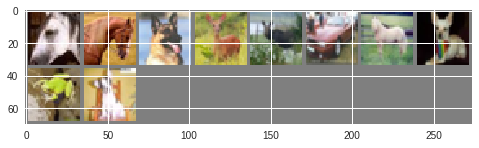

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(get_train_loader(10))
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#Designing a Neural Net in Pytorch

Pytorch makes it pretty easy to implement all of those feature engineering steps that we described above. We’ll be making use of 4 major functions in our CNN class:

1. **torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)** – applies convolution
2. **torch.nn.relu(x)** – applies ReLU
3. **torch.nn.MaxPool2d(kernel_size, stride, padding)** – applies Max Pooling
4.**torch.nn.Linear(in_features, out_features)** – fully connected layer (multiply inputs by learned weights)

Writing CNN code in Pytorch can get a little complex, since everything is defined inside of one class. We’ll create a SimpleCNN class which inherits from the master torch.nn.Module class.




In [0]:
from torch.autograd import Variable
import torch.nn.functional as F

class SimpleCNN(torch.nn.Module):
    
    #Our batch shape for input x is (3, 32, 32)
    
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        #Input channels = 3, output channels = 18
        self.conv1 = torch.nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #4608 input features, 64 output features (see sizing flow below)
        self.fc1 = torch.nn.Linear(18 * 16 * 16, 64)
        
        #64 input features, 10 output features for our 10 defined classes
        self.fc2 = torch.nn.Linear(64, 10)
        
    def forward(self, x):
        
        #Computes the activation of the first convolution
        #Size changes from (3, 32, 32) to (18, 32, 32)
        x = F.relu(self.conv1(x))
        
        #Size changes from (18, 32, 32) to (18, 16, 16)
        x = self.pool(x)
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from (18, 16, 16) to (1, 4608)
        #Recall that the -1 infers this dimension from the other given dimension
        x = x.view(-1, 18 * 16 *16)
        
        #Computes the activation of the first fully connected layer
        #Size changes from (1, 4608) to (1, 64)
        x = F.relu(self.fc1(x))
        
        #Computes the second fully connected layer (activation applied later)
        #Size changes from (1, 64) to (1, 10)
        x = self.fc2(x)
        return(x)

We’re creating a SimpleCNN class with one class method: **forward**. The** forward()** *method computes a forward pass of the CNN, which includes the preprocessing steps we outlined above.* When an instance of the SimpleCNN class is created, we define internal functions to represent the layers of the net. During the forward pass we call these internal functions.

One of the pesky parts about manually defining neural nets is that we need to specify the sizes of inputs and outputs at each part of the process. The comments should give some direction as to what’s happening with size changes at each step. In general, the output size for any dimension in our input set can be defined as:

In [87]:
def outputSize(in_size, kernel_size, stride, padding):
    
    output = int((in_size - kernel_size + 2*(padding)) / stride) + 1
    
    return (output)

 
#Input (3, 32, 32) Conv, Output specified = 18 for batch size
print((18,
       outputSize(in_size=32, kernel_size=3, stride=1, padding=1),
       outputSize(in_size=32, kernel_size=3, stride=1, padding=1),
      ))

#Input (18, 32, 32) MaxPooling
print((18,
       outputSize(in_size=32, kernel_size=2, stride=2, padding=0),
       outputSize(in_size=32, kernel_size=2, stride=2, padding=0),
      ))


(18, 32, 32)
(18, 16, 16)


To use an example from our CNN, look at the max pooling layer. *The input dimension is (18, 32, 32*)–– using our formula applied to each of the final two dimensions (**the first dimension, or number of feature maps, remains unchanged during any pooling operation**), we get an *output size of (18, 16, 16).*

#Training

Once we’ve defined the class for our CNN, we need to train the net itself. This is where neural network code gets interesting. If you’re working with more basic types of Machine Learning algorithms, you can usually get meaningful output in just a few lines of code. For example, implementing a Support Vector Machine in the sklearn Python package is as easy as:

In [0]:
#Import the support vector machine module from the sklearn framework
from sklearn import svm

#Label x and y variables from our dataset
#x = ourData.features
#y = ourData.labels

#Initialize our algorithm
#classifier = svm.SVC()

#Fit model to our data
#classifier.fit(x,y)

With neural networks in **Pytorch (and TensorFlow)** though, it takes a bunch more code than that. Our basic flow is a 
1. training loop: each time we pass through the loop (called and “epoch”), we compute a forward pass on the network 
2. And implement backpropagation to adjust the weights. 
3. We’ll also record some other measurements like loss and time passed, so that we can analyze them as the net trains itself.

To start, we’ll define our data loaders using the samplers we created above.

We’ll also define our **loss and optimizer functions** that the CNN will use to find the right weights. We’ll be using 

1. **Cross Entropy Loss (Log Loss) as our loss function**, which ***strongly penalizes high confidence in the wrong answer.*** 
2. The optimizer is the popular **Adam algorithm**.




In [0]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    
    #Loss function
    loss = torch.nn.CrossEntropyLoss()
    
    #Optimizer
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    
    return(loss, optimizer)

Finally, we’ll define a function to train our CNN using a simple for loop.

In [0]:
import time

def trainNet(net, batch_size, n_epochs, learning_rate):
    
    #Traning on GPU
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Assume that we are on a CUDA machine, then this should print a CUDA device:
    print(device)
    
    #For GPU Processing
    net.to(device)
    
    
    #Print all of the hyperparameters of the training iteration:
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    #Get training data
    train_loader = get_train_loader(batch_size)
    n_batches = len(train_loader)
    
    #Create our loss and optimizer functions
    loss, optimizer = createLossAndOptimizer(net, learning_rate)
    
    #Time for printing
    training_start_time = time.time()
    
    #Loop for n_epochs
    for epoch in range(n_epochs):
 
        running_loss = 0.0
        print_every = n_batches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, data in enumerate(train_loader, 0):
            
            
            #Get inputs
            inputs, labels = data
            
            #For GPU Processsing
            inputs, labels = inputs.to(device), labels.to(device)
            
            #Wrap them in a Variable object
            inputs, labels = Variable(inputs), Variable(labels)
            
            #Set the parameter gradients to zero
            optimizer.zero_grad()
            
            #Forward pass, backward pass, optimize
            outputs = net(inputs)
            loss_size = loss(outputs, labels)
            loss_size.backward()
            optimizer.step()
            
            #Print statistics
            running_loss += loss_size.data[0]
            total_train_loss += loss_size.data[0]
            
            #Print every 10th batch of an epoch
            if (i + 1) % (print_every + 1) == 0:
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                        epoch+1, int(100 * (i+1) / n_batches), running_loss / print_every, time.time() - start_time))
                #Reset running loss and time
                running_loss = 0.0
                start_time = time.time()
            
        #At the end of the epoch, do a pass on the validation set
        total_val_loss = 0
        for inputs, labels in val_loader:
            
            #Wrap tensors in Variables
            inputs, labels = Variable(inputs), Variable(labels)
            
            #For GPU Processsing
            inputs, labels = inputs.to(device), labels.to(device)
            
            #Forward pass
            val_outputs = net(inputs)
            val_loss_size = loss(val_outputs, labels)
            total_val_loss += val_loss_size.data[0]
            
        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))
        
    print("Training finished, took {:.2f}s".format(time.time() - training_start_time))


During each epoch of training, we pass data to the model in batches whose size we define when we call the training loop. Data is feature engineered using the SimpleCNN class we’ve defined, and then basic metrics are printed after a few passes. During each loop, we also calculate the loss on our validation set.


To actually train the net now only requires two lines of code:




In [91]:
CNN = SimpleCNN()
trainNet(CNN, batch_size=32, n_epochs=5, learning_rate=0.001)

cuda:0
===== HYPERPARAMETERS =====
batch_size= 32
epochs= 5
learning_rate= 0.001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch 1, 10% 	 train_loss: 2.06 took: 0.72s
Epoch 1, 20% 	 train_loss: 1.87 took: 0.62s
Epoch 1, 30% 	 train_loss: 1.79 took: 0.60s
Epoch 1, 40% 	 train_loss: 1.70 took: 0.63s
Epoch 1, 50% 	 train_loss: 1.63 took: 0.60s
Epoch 1, 60% 	 train_loss: 1.58 took: 0.63s
Epoch 1, 70% 	 train_loss: 1.52 took: 0.63s
Epoch 1, 80% 	 train_loss: 1.47 took: 0.62s
Epoch 1, 90% 	 train_loss: 1.46 took: 0.63s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Validation loss = 1.33
Epoch 2, 10% 	 train_loss: 1.40 took: 0.74s
Epoch 2, 20% 	 train_loss: 1.41 took: 0.62s
Epoch 2, 30% 	 train_loss: 1.31 took: 0.62s
Epoch 2, 40% 	 train_loss: 1.32 took: 0.61s
Epoch 2, 50% 	 train_loss: 1.35 took: 0.61s
Epoch 2, 60% 	 train_loss: 1.31 took: 0.63s
Epoch 2, 70% 	 train_loss: 1.30 took: 0.63s
Epoch 2, 80% 	 train_loss: 1.23 took: 0.60s
Epoch 2, 90% 	 train_loss: 1.31 took: 0.62s
Validation loss = 1.28
Epoch 3, 10% 	 train_loss: 1.20 took: 0.72s
Epoch 3, 20% 	 train_loss: 1.16 took: 0.60s
Epoch 3, 30% 	 train_loss: 1.23 took: 0.59s
Epoch 3, 40% 	 train_loss: 1.23 took: 0.61s
Epoch 3, 50% 	 train_loss: 1.18 took: 0.60s
Epoch 3, 60% 	 train_loss: 1.18 took: 0.59s
Epoch 3, 70% 	 train_loss: 1.19 took: 0.60s
Epoch 3, 80% 	 train_loss: 1.18 took: 0.62s
Epoch 3, 90% 	 train_loss: 1.21 took: 0.60s
Validation loss = 1.27
Epoch 4, 10% 	 train_loss: 1.11 took: 0.72s
Epoch 4, 20% 	 train_loss: 1.07 took: 0.61s
Epoch 4, 30% 	 train_loss: 1.09 took: 0.60s
Epoch 4

#Second CNN Network

In [92]:
#Input (18, 16, 16) Conv, Output specified = 18 for batch size
print((18,
       outputSize(in_size=16, kernel_size=3, stride=1, padding=1),
       outputSize(in_size=16, kernel_size=3, stride=1, padding=1),
      ))

#Input (18, 16, 16) MaxPooling
print((32,
       outputSize(in_size=16, kernel_size=2, stride=2, padding=0),
       outputSize(in_size=16, kernel_size=2, stride=2, padding=0),
      ))

(18, 16, 16)
(32, 8, 8)


In [0]:
from torch.autograd import Variable
import torch.nn.functional as F

class LessSimpleCNN(torch.nn.Module):
    
    #Our batch shape for input x is (3, 32, 32)
    
    def __init__(self):
        super(LessSimpleCNN, self).__init__()
        
        #Input channels = 3, output channels = 18
        self.conv1 = torch.nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #Input channels = 3, output channels = 18
        self.conv2 = torch.nn.Conv2d(18, 18, kernel_size=3, stride=1, padding=1)
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #4608 input features, 64 output features (see sizing flow below)
        self.fc1 = torch.nn.Linear(18 * 8 * 8, 120)
        
         #4608 input features, 64 output features (see sizing flow below)
        self.fc2 = torch.nn.Linear(120, 200)
        
        #64 input features, 10 output features for our 10 defined classes
        self.fc3 = torch.nn.Linear(200, 10)
        
    def forward(self, x):
        
        #Computes the activation of the first convolution
        
        #Size changes from (3, 32, 32) to (18, 32, 32)
        x = F.relu(self.conv1(x))
        #Size changes from (18, 32, 32) to (18, 16, 16)
        x = self.pool1(x)
        
        #Size changes from (3, 32, 32) to (18, 32, 32)
        x = F.relu(self.conv2(x))
        #Size changes from (18, 32, 32) to (18, 8, 8)
        x = self.pool2(x)
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from (18, 8, 8) to (1, 1152)
        #Recall that the -1 infers this dimension from the other given dimension
        x = x.view(-1, 18 * 8 * 8)
        
        #Computes the activation of the first fully connected layer
        #Size changes from (1, 1152) to (1, 200)
        x = F.relu(self.fc1(x))
        
        #Size changes from (1, 200) to (1, 120)
        x = F.relu(self.fc2(x))
        
        #Computes the second fully connected layer (activation applied later)
        #Size changes from (1, 120) to (1, 10)
        x = self.fc3(x)
        return(x)

In [117]:
CNN = LessSimpleCNN()
trainNet(CNN, batch_size=32, n_epochs=5, learning_rate=0.001)

cuda:0
===== HYPERPARAMETERS =====
batch_size= 32
epochs= 5
learning_rate= 0.001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch 1, 10% 	 train_loss: 2.17 took: 0.60s
Epoch 1, 20% 	 train_loss: 1.97 took: 0.56s
Epoch 1, 30% 	 train_loss: 1.77 took: 0.75s
Epoch 1, 40% 	 train_loss: 1.65 took: 0.74s
Epoch 1, 50% 	 train_loss: 1.61 took: 0.71s
Epoch 1, 60% 	 train_loss: 1.54 took: 0.71s
Epoch 1, 70% 	 train_loss: 1.55 took: 0.70s
Epoch 1, 80% 	 train_loss: 1.49 took: 0.70s
Epoch 1, 90% 	 train_loss: 1.44 took: 0.72s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Validation loss = 1.37
Epoch 2, 10% 	 train_loss: 1.40 took: 0.83s
Epoch 2, 20% 	 train_loss: 1.36 took: 0.70s
Epoch 2, 30% 	 train_loss: 1.27 took: 0.70s
Epoch 2, 40% 	 train_loss: 1.29 took: 0.68s
Epoch 2, 50% 	 train_loss: 1.30 took: 0.69s
Epoch 2, 60% 	 train_loss: 1.29 took: 0.69s
Epoch 2, 70% 	 train_loss: 1.30 took: 0.67s
Epoch 2, 80% 	 train_loss: 1.25 took: 0.72s
Epoch 2, 90% 	 train_loss: 1.23 took: 0.73s
Validation loss = 1.22
Epoch 3, 10% 	 train_loss: 1.17 took: 0.81s
Epoch 3, 20% 	 train_loss: 1.15 took: 0.69s
Epoch 3, 30% 	 train_loss: 1.15 took: 0.68s
Epoch 3, 40% 	 train_loss: 1.16 took: 0.72s
Epoch 3, 50% 	 train_loss: 1.14 took: 0.69s
Epoch 3, 60% 	 train_loss: 1.15 took: 0.69s
Epoch 3, 70% 	 train_loss: 1.13 took: 0.70s
Epoch 3, 80% 	 train_loss: 1.17 took: 0.68s
Epoch 3, 90% 	 train_loss: 1.09 took: 0.69s
Validation loss = 1.14
Epoch 4, 10% 	 train_loss: 1.03 took: 0.80s
Epoch 4, 20% 	 train_loss: 1.03 took: 0.67s
Epoch 4, 30% 	 train_loss: 1.02 took: 0.69s
Epoch 4

#Test the Network

In [0]:
#Tensorboard - Pytorch (Soon)
#https://github.com/lanpa/tensorboard-pytorch-examples/blob/master/imagenet/main.py

GroundTruth:   deer plane  ship  frog


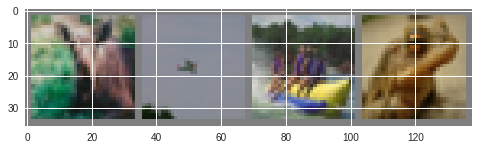

In [123]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [127]:
net = SimpleCNN()
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer plane plane  deer


In [128]:
#Test in the whole dataset
#Better than chance is 10% accuracy (randomly picking a class out of 10 classes). 

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 11 %


In [129]:
#Classes that performed well, and the classes that did not perform well:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 76 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer : 36 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  2 %
